<a href="https://colab.research.google.com/github/Medianto09/Text-Summarization_liputan6/blob/main/text_summarization_BERT_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data

In [ ]:
# Download dataset liputan6 - https://drive.google.com/file/d/1ixaIO24XBZX-BFVyHIk0FG0kI2W3lACD/view
!gdown 1ixaIO24XBZX-BFVyHIk0FG0kI2W3lACD

Downloading...
From (original): https://drive.google.com/uc?id=1ixaIO24XBZX-BFVyHIk0FG0kI2W3lACD
From (redirected): https://drive.google.com/uc?id=1ixaIO24XBZX-BFVyHIk0FG0kI2W3lACD&confirm=t&uuid=6bbc4317-0ea2-43af-a89e-0deceb87c849
To: /content/liputan6_data.tar.gz
100% 165M/165M [00:01<00:00, 85.0MB/s]


In [ ]:
!tar -xf liputan6_data.tar.gz

# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
import spacy
import re
import json

# Canonical

## train

In [ ]:
# Get a list of all files in the directory
files = os.listdir('/content/liputan6_data/canonical/train')
train_path = '/content/liputan6_data/canonical/train/'

id = list()
clean_article = list()
clean_summary = list()
extractive_summary = list()
# Iterate over the list of files
for file_name in files:
    # Construct the full path to the file
    file_path = os.path.join(train_path, file_name)

   # Membuka dan membaca file JSON
    with open(file_path, 'r') as f:
      data = json.load(f)
      id.append(data['id'])
      clean_article.append(data['clean_article'])
      clean_summary.append(data['clean_summary'])
      extractive_summary.append(data['extractive_summary'])

# Create a DataFrame from the list
canonical_train = pd.DataFrame({'id': id, 'clean_article':clean_article, 'clean_summary':clean_summary, 'extractive_summary':extractive_summary})
canonical_train.head()

,id,clean_article,clean_summary,extractive_summary
0,46766,"[[Liputan6, ., com, ,, Jakarta, :, Menteri, Ne...","[[Somasi, terhadap, Ketua, MPR, Amien, Rais, d...","[0, 1]"
1,289332,"[[Liputan6, ., com, ,, Berlin, :, Spanyol, bol...","[[Spanyol, menorehkan, sejarah, untuk, pertama...","[0, 1]"
2,280580,"[[Liputan6, ., com, ,, Tangerang, :, Tiga, rel...","[[Empat, relawan, dan, seorang, jurnalis, tele...","[0, 3]"
3,228834,"[[SARAH, Azhari, sangat, emosi, dan, terpukul,...","[[SARAH, Azhari, sangat, emosi, dan, terpukul,...","[0, 1, 2]"
4,225019,"[[KASUS, video, mesum, Maria, Eva, dan, mantan...","[[KASUS, video, mesum, Maria, Eva, dan, mantan...","[0, 1, 2]"


## dev

In [ ]:
# Get a list of all files in the directory
files = os.listdir('/content/liputan6_data/canonical/dev')
dev_path = '/content/liputan6_data/canonical/dev'

id = list()
clean_article = list()
clean_summary = list()
extractive_summary = list()
# Iterate over the list of files
for file_name in files:
    # Construct the full path to the file
    file_path = os.path.join(dev_path, file_name)

   # Membuka dan membaca file JSON
    with open(file_path, 'r') as f:
      data = json.load(f)
      id.append(data['id'])
      clean_article.append(data['clean_article'])
      clean_summary.append(data['clean_summary'])
      extractive_summary.append(data['extractive_summary'])

# Create a DataFrame from the list
canonical_dev = pd.DataFrame({'id': id, 'clean_article':clean_article, 'clean_summary':clean_summary, 'extractive_summary':extractive_summary})
canonical_dev.head()

,id,clean_article,clean_summary,extractive_summary
0,5103,"[[Liputan6, ., com, ,, Kulonprogo, :, Bencana,...","[[Pencarian, korban, bencana, tanah, longsor, ...","[2, 7, 4]"
1,12952,"[[Liputan6, ., com, ,, Jakarta, :, Pemerintah,...","[[Pemerintah, dan, masyarakat, mesti, memberik...","[0, 6]"
2,8642,"[[Liputan6, ., com, ,, Jakarta, :, Satu-persat...","[[Sejumlah, mantan, pejabat, di, era, Orde, Ba...","[0, 3]"
3,8832,"[[Liputan6, ., com, ,, Jakarta, :, Tema, cinta...","[[Pianis, Ananda, Sukarlan, mengiringi, solois...","[1, 2]"
4,226,"[[Liputan6, ., com, ,, Jakarta, :, Rapat, Pari...","[[Dewan, Perwakilan, Rakyat, membentuk, Paniti...","[0, 3]"


## test

In [ ]:
# Get a list of all files in the directory
files = os.listdir('/content/liputan6_data/canonical/test')
test_path = '/content/liputan6_data/canonical/test'

id = list()
clean_article = list()
clean_summary = list()
extractive_summary = list()
# Iterate over the list of files
for file_name in files:
    # Construct the full path to the file
    file_path = os.path.join(test_path, file_name)

   # Membuka dan membaca file JSON
    with open(file_path, 'r') as f:
      data = json.load(f)
      id.append(data['id'])
      clean_article.append(data['clean_article'])
      clean_summary.append(data['clean_summary'])
      extractive_summary.append(data['extractive_summary'])

# Create a DataFrame from the list
canonical_test = pd.DataFrame({'id': id, 'clean_article':clean_article, 'clean_summary':clean_summary, 'extractive_summary':extractive_summary})
canonical_test.head()

,id,clean_article,clean_summary,extractive_summary
0,24258,"[[Liputan6, ., com, ,, Palembang, :, Tim, Buru...","[[Jajaran, Poltabes, Palembang, menahan, dua, ...","[1, 4]"
1,15618,"[[Liputan6, ., com, ,, Jakarta, :, Partai, Keb...","[[PKB, tidak, akan, ikut-ikutan, merekomendasi...","[0, 8]"
2,22193,"[[Liputan6, ., com, ,, Jakarta, :, Unjuk, rasa...","[[Tokoh, Betawi, ,, K, ., H, .], [Abdullah, Ha...","[1, 2]"
3,17598,"[[Liputan6, ., com, ,, Takengong, :, Pasokan, ...","[[Sejak, sepekan, terakhir, ,, pasokan, kebutu...","[2, 3]"
4,15546,"[[Liputan6, ., com, ,, Jakarta, :, Pimpinan, K...","[[Komisi, Nasional, Hak, Asasi, Manusia, mende...","[2, 3]"


# Xtreme

## dev

In [ ]:
# Get a list of all files in the directory
files = os.listdir('/content/liputan6_data/xtreme/dev')
dev_path = '/content/liputan6_data/xtreme/dev/'

id = list()
clean_article = list()
clean_summary = list()
extractive_summary = list()
# Iterate over the list of files
for file_name in files:
    # Construct the full path to the file
    file_path = os.path.join(dev_path, file_name)

   # Membuka dan membaca file JSON
    with open(file_path, 'r') as f:
      data = json.load(f)
      id.append(data['id'])
      clean_article.append(data['clean_article'])
      clean_summary.append(data['clean_summary'])
      extractive_summary.append(data['extractive_summary'])

# Create a DataFrame from the list
xtreme_dev = pd.DataFrame({'id': id, 'clean_article':clean_article, 'clean_summary':clean_summary, 'extractive_summary':extractive_summary})
xtreme_dev.head()

,id,clean_article,clean_summary,extractive_summary
0,5944,"[[Liputan6, ., com, ,, Jakarta, :, Ada, 2, ,, ...","[[Pemerintah, berprinsip, tak, akan, membuat, ...","[0, 5]"
1,10271,"[[Liputan6, ., com, ,, Kuala, Kapuas, :, Situa...","[[Setelah, keadaan, mencekam, dalam, sepekan, ...","[0, 2]"
2,3445,"[[Liputan6, ., com, ,, Jakarta, :, Setelah, ja...","[[Pemerintah, menganugerahkan, gelar, Pahlawan...","[0, 3]"
3,8156,"[[Liputan6, ., com, ,, Banda, Aceh, :, TNI, ak...","[[Militer, di, Aceh, siap, menjalankan, darura...","[0, 2]"
4,9465,"[[Liputan6, ., com, ,, Jakarta, :, Hutan, tana...","[[Departemen, Kehutanan, akan, meminjamkan, da...","[0, 1]"


## test

In [ ]:
# Get a list of all files in the directory
files = os.listdir('/content/liputan6_data/xtreme/test')
test_path = '/content/liputan6_data/xtreme/test'

id = list()
clean_article = list()
clean_summary = list()
extractive_summary = list()
# Iterate over the list of files
for file_name in files:
    # Construct the full path to the file
    file_path = os.path.join(test_path, file_name)

   # Membuka dan membaca file JSON
    with open(file_path, 'r') as f:
      data = json.load(f)
      id.append(data['id'])
      clean_article.append(data['clean_article'])
      clean_summary.append(data['clean_summary'])
      extractive_summary.append(data['extractive_summary'])

# Create a DataFrame from the list
xtreme_test = pd.DataFrame({'id': id, 'clean_article':clean_article, 'clean_summary':clean_summary, 'extractive_summary':extractive_summary})
xtreme_test.head()

,id,clean_article,clean_summary,extractive_summary
0,17543,"[[Liputan6, ., com, ,, Jakarta, :, Presiden, M...","[[Sedianya, Presiden, Megawati, Sukarnoputri, ...","[0, 5]"
1,13428,"[[Liputan6, ., com, ,, Jakarta, :, Direktorat,...","[[Direktorat, Jenderal, Pajak, bakal, mencabut...","[0, 5]"
2,22478,"[[Liputan6, ., com, ,, Jakarta, :, Presiden, M...","[[Daftar, nama, calon, Kapolri, yang, telah, d...","[0, 1]"
3,20116,"[[Liputan6, ., com, ,, Bali, :, Sejak, dulu, t...","[[Sejak, dulu, tato, telah, menjadi, ekspresi,...","[0, 1]"
4,14707,"[[Liputan6, ., com, ,, Jakarta, :, Komisi, IV,...","[[Penghentian, dana, subsidi, dipertanyakan, a...","[11, 12]"


# Combined Data

In [ ]:
# Append df2 to df1
full_canonical_data = canonical_train.append(canonical_dev, ignore_index=True)
full_canonical_data = full_canonical_data.append(canonical_test, ignore_index=True)

# Print the appended DataFrame
full_canonical_data.shape

<ipython-input-9-d0bd2957c234>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_canonical_data = canonical_train.append(canonical_dev, ignore_index=True)
<ipython-input-9-d0bd2957c234>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_canonical_data = full_canonical_data.append(canonical_test, ignore_index=True)


(215827, 4)

In [ ]:
# full_canonical_data.to_csv('full_canonical_data.csv',index=False)

In [ ]:
# Append df2 to df1
full_xtreme_data = canonical_train.append(xtreme_dev, ignore_index=True)
full_xtreme_data = xtreme_dev.append(xtreme_test, ignore_index=True)

# Print the appended DataFrame
full_xtreme_data.shape

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# full_xtreme_data.to_csv('full_xtreme_data.csv',index=False)

# EDA

In [ ]:
xtreme_dev = xtreme_dev.explode('clean_article')
xtreme_dev.reset_index(inplace=True, drop=True)
xtreme_dev.head()

,id,clean_article,clean_summary,extractive_summary
0,5944,"[Liputan6, ., com, ,, Jakarta, :, Ada, 2, ,, 3...","[[Pemerintah, berprinsip, tak, akan, membuat, ...","[0, 5]"
1,5944,"[Tetapi, ,, hanya, PNS, berstatus, pusat, saja...","[[Pemerintah, berprinsip, tak, akan, membuat, ...","[0, 5]"
2,5944,"[Dengan, demikian, pemindahan, tugas, itu, ber...","[[Pemerintah, berprinsip, tak, akan, membuat, ...","[0, 5]"
3,5944,"["", Itulah, yang, akan, kita, alihkan, ,, "", k...","[[Pemerintah, berprinsip, tak, akan, membuat, ...","[0, 5]"
4,5944,"[Dia, menyadari, ,, yang, menjadi, persoalan, ...","[[Pemerintah, berprinsip, tak, akan, membuat, ...","[0, 5]"


In [ ]:
xtreme_dev[['id']].head(10)

,id
0,5944
1,10271
2,3445
3,8156
4,9465
5,5429
6,3627
7,2988
8,281
9,3666


In [ ]:
xtreme_dev[['id']].to_csv('xtreme_dev.csv',index=False)

In [ ]:
xtreme_test = xtreme_test.explode('clean_article')
xtreme_test.reset_index(inplace=True, drop=True)
xtreme_test.head()

,id,clean_article,clean_summary,extractive_summary
0,17543,"[Liputan6, ., com, ,, Jakarta, :, Presiden, Me...","[[Sedianya, Presiden, Megawati, Sukarnoputri, ...","[0, 5]"
1,17543,"[Sebelumnya, ,, kabinet, akan, diumumkan, sete...","[[Sedianya, Presiden, Megawati, Sukarnoputri, ...","[0, 5]"
2,17543,"[Belakangan, diketahui, ,, pimpinan, parpol, t...","[[Sedianya, Presiden, Megawati, Sukarnoputri, ...","[0, 5]"
3,17543,"[Tak, ada, keterangan, resmi, dari, Presiden, ...","[[Sedianya, Presiden, Megawati, Sukarnoputri, ...","[0, 5]"
4,17543,"[Namun, ,, menurut, Presiden, Partai, Keadilan...","[[Sedianya, Presiden, Megawati, Sukarnoputri, ...","[0, 5]"


In [ ]:
xtreme_test[['id']].to_csv('xtreme_test.csv',index=False)

In [ ]:
# Calculate the maximum length of text in the 'Text_Column'
max_len = full_canonical_data['clean_article'].apply(lambda x: len(x)).max()

# Print the maximum length
print("Maximum length:", max_len)

Maximum length: 1217


In [ ]:
# Calculate the maximum length of text in the 'Text_Column'
max_len = full_canonical_data['clean_summary'].apply(lambda x: len(x)).max()

# Print the maximum length
print("Maximum length:", max_len)

Maximum length: 12


In [ ]:
len(full_canonical_data.loc[0, 'clean_summary'])

2

In [ ]:
# Convert each list in the 'List_Column' into a single text string
full_canonical_data['clean_article'] = full_canonical_data['clean_article'].apply(lambda x: ' '.join(x))

In [ ]:
full_canonical_data = full_canonical_data.explode('clean_summary')
full_canonical_data['clean_summary'] = full_canonical_data['clean_summary'].apply(lambda x: ' '.join(x))

<Axes: >

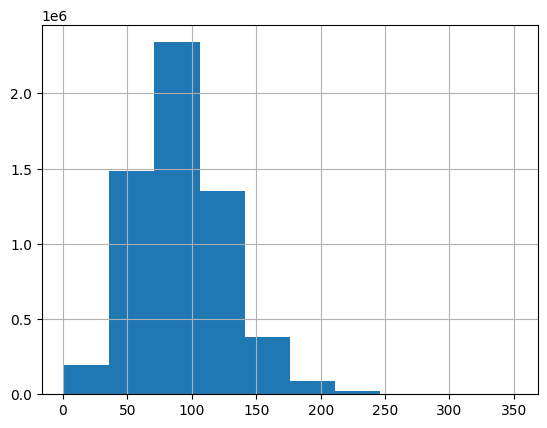

In [ ]:
full_canonical_data['clean_summary'].str.len().hist()

<Axes: >

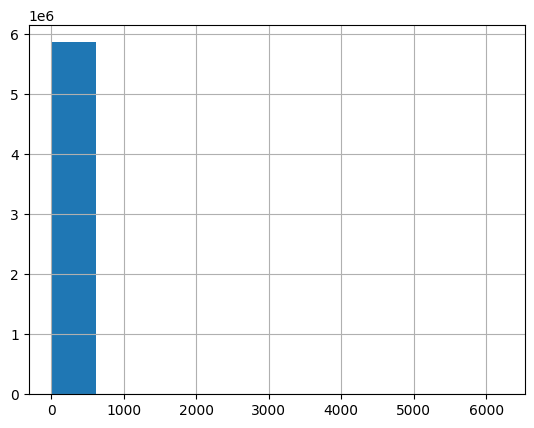

In [ ]:
full_canonical_data['clean_article'].str.len().hist()

In [ ]:
import pandas as pd
from collections import Counter

# Tokenize the text and count occurrences of each word
word_counts = Counter()
for text in full_canonical_data['clean_article']:
    word_counts.update(text.split())

# Convert the Counter object to a DataFrame
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Count'])

# Sort the DataFrame by word counts
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

                Count
.             6919950
,             6378780
yang          1985148
di            1898553
dan           1490131
...               ...
Arsenal-West        1
asus                1
Tamalea             1
golHenrik           1
ILMISBI             1

[354988 rows x 1 columns]


In [ ]:
word_counts_df.head()

,Count
.,6919950
",",6378780
yang,1985148
di,1898553
dan,1490131


# Transfer Learning

## BERT Abstractive Summarizer

In [ ]:
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')

  print('there are %d GPU(s) available.' % torch.cuda.device_count())

  print('we will use the GPU: ', torch.cuda.get_device_name(0))

else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")

In [ ]:
!pip show transformers

Name: transformers
Version: 2.2.0
Summary: State-of-the-art Natural Language Processing for TensorFlow 2.0 and PyTorch
Home-page: https://github.com/huggingface/transformers
Author: Thomas Wolf, Lysandre Debut, Victor Sanh, Julien Chaumond, Google AI Language Team Authors, Open AI team Authors, Facebook AI Authors, Carnegie Mellon University Authors
Author-email: thomas@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: boto3, numpy, regex, requests, sacremoses, sentencepiece, tqdm
Required-by: bert-extractive-summarizer


In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, BertForConditionalGeneration

tokenizer = BertTokenizer.from_pretrained("cahya/bert2bert-indonesian-summarization")
tokenizer.bos_token = tokenizer.cls_token
tokenizer.eos_token = tokenizer.sep_token
model = BertForConditionalGeneration.from_pretrained("cahya/bert2bert-indonesian-summarization")

ImportError: cannot import name 'BertForConditionalGeneration' from 'transformers' (/usr/local/lib/python3.10/dist-packages/transformers/__init__.py)

In [ ]:
from transformers import BertTokenizer, EncoderDecoderModel

tokenizer = BertTokenizer.from_pretrained("cahya/bert2bert-indonesian-summarization")
tokenizer.bos_token = tokenizer.cls_token
tokenizer.eos_token = tokenizer.sep_token
model = EncoderDecoderModel.from_pretrained("cahya/bert2bert-indonesian-summarization")

#
ARTICLE_TO_SUMMARIZE = ""

# generate summary
input_ids = tokenizer.encode(ARTICLE_TO_SUMMARIZE, return_tensors='pt')
summary_ids = model.generate(input_ids,
            min_length=20,
            max_length=80,
            num_beams=10,
            repetition_penalty=2.5,
            length_penalty=1.0,
            early_stopping=True,
            no_repeat_ngram_size=2,
            use_cache=True,
            do_sample = True,
            temperature = 0.8,
            top_k = 50,
            top_p = 0.95)

summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(summary_text)


ImportError: cannot import name 'BartModel' from 'transformers' (/usr/local/lib/python3.10/dist-packages/transformers/__init__.py)

# Fine-Tuning

In [ ]:
# Tokenizer --> model
# Datacolator --> model